# Description

This notebook runs some pre-analyses using spectral clustering to explore the best set of parameters to cluster `z_score_std` data version.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 30000

# Z-score standardized data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [9]:
data = pd.read_pickle(input_filepath)

In [10]:
data.shape

(3752, 987)

In [11]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# Clustering

In [12]:
from sklearn.cluster import SpectralClustering

from clustering.utils import compute_performance

## `gamma` parameter

### Using default value (`gamma=1.0`)

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=1.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8

In [14]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 1

0    3752
dtype: int64

The algorithm does not work with the default `gamma=1.0`. Other values for this parameter should be explored.

### Using `gamma=5.00`

In [15]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=5.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site

In [16]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 1

0    3752
dtype: int64

The algorithm does not work either with `gamma>1.0`.

### Using `gamma=0.01`

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.01,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [18]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert 3 < _tmp.loc[1] < 10

0    3747
1       5
dtype: int64

In [19]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.30 < _tmp["si"] < 0.31
assert 10.0 < _tmp["ch"] < 11.00
assert 1.30 < _tmp["db"] < 1.50

'Silhouette (higher is better): 0.305'

'Calinski-Harabasz (higher is better): 10.292'

'Davies-Bouldin (lower is better): 1.400'

For values around `gamma=0.01` the algorithm takes a lot of time to converge (here I used `eigen_tol=1e-03` to force convergence).

### Using `gamma=0.001`

In [20]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.001,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [21]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert 80 < _tmp.loc[1] < 90

0    3665
1      87
dtype: int64

In [22]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.10 < _tmp["si"] < 0.16
assert 40.0 < _tmp["ch"] < 42.00
assert 3.00 < _tmp["db"] < 4.00

'Silhouette (higher is better): 0.151'

'Calinski-Harabasz (higher is better): 41.033'

'Davies-Bouldin (lower is better): 3.024'

For values around `gamma=0.001` now the algorithm converges, although most of the performance measures are worse. This suggests smaller values should be explored for this parameter.

## Extended test

Here I run some test across several `k` and `gamma` values; then I check how results perform with different clustering quality measures.

In [23]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMAS"] = [
    1e-03,
    #     1e-04,
    #     1e-05,
    1e-05,
    #     1e-06,
    #     1e-07,
    #     1e-08,
    #     1e-09,
    1e-10,
    #     1e-11,
    #     1e-12,
    #     1e-13,
    #     1e-14,
    1e-15,
    1e-17,
    1e-20,
    1e-30,
    1e-40,
    1e-50,
]
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMAS': [0.001, 1e-05, 1e-10, 1e-15, 1e-17, 1e-20, 1e-30, 1e-40, 1e-50],
 'AFFINITY': 'rbf'}

In [24]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in CLUSTERING_OPTIONS["K_RANGE"]:
    for gamma_value in CLUSTERING_OPTIONS["GAMMAS"]:
        for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
            clus = SpectralClustering(
                eigen_solver="arpack",
                n_clusters=k,
                n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
                affinity=CLUSTERING_OPTIONS["AFFINITY"],
                gamma=gamma_value,
                random_state=random_state,
            )

            method_name = type(clus).__name__
            CLUSTERERS[f"{method_name} #{idx}"] = clus

            random_state = random_state + 1
            idx = idx + 1

In [25]:
display(len(CLUSTERERS))

450

In [26]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30001))

In [27]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Generate ensemble

In [28]:
import tempfile
from clustering.ensembles.utils import generate_ensemble

In [31]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=["n_clusters", "gamma"],
)

'Ensemble file exists'

In [32]:
ensemble.shape

(450, 4)

In [33]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001


In [34]:
ensemble["gamma"] = ensemble["gamma"].apply(lambda x: f"{x:.1e}")

In [35]:
ensemble["n_clusters"].value_counts()

60    45
50    45
40    45
30    45
20    45
10    45
8     45
6     45
4     45
2     45
Name: n_clusters, dtype: int64

In [36]:
_tmp = ensemble["n_clusters"].value_counts().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"] * len(CLUSTERING_OPTIONS["GAMMAS"])
)

In [37]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    450.000000
mean      23.000000
std       19.846291
min        2.000000
25%        6.000000
50%       15.000000
75%       40.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [38]:
assert ensemble_stats["min"] > 1

In [39]:
assert not ensemble["n_clusters"].isna().any()

In [40]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [41]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [42]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])
assert not np.any(
    [pd.Series(part["partition"]).isna().any() for idx, part in ensemble.iterrows()]
)

In [43]:
# check that the number of clusters in the partitions are the expected ones
_real_k_values = ensemble["partition"].apply(lambda x: np.unique(x).shape[0])
display(_real_k_values)
assert np.all(ensemble["n_clusters"].values == _real_k_values.values)

clusterer_id
SpectralClustering #0       2
SpectralClustering #1       2
SpectralClustering #2       2
SpectralClustering #3       2
SpectralClustering #4       2
                           ..
SpectralClustering #445    60
SpectralClustering #446    60
SpectralClustering #447    60
SpectralClustering #448    60
SpectralClustering #449    60
Name: partition, Length: 450, dtype: int64

## Add clustering quality measures

In [44]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [45]:
ensemble = ensemble.assign(
    si_score=ensemble["partition"].apply(lambda x: silhouette_score(data, x)),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [46]:
ensemble.shape

(450, 7)

In [47]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma,si_score,ch_score,db_score
clusterer_id,,,,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181


# Cluster quality

In [48]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

si_score   ch_score   db_score
n_clusters gamma                                  
2          1.0e-03  0.150591  41.033402   3.024181
           1.0e-05  0.115500  48.835638   4.233984
           1.0e-10  0.115500  48.835638   4.233984
           1.0e-15  0.110206  48.621876   4.361577
           1.0e-17  0.000374   1.022023  10.381917
           1.0e-20 -0.001429   1.042379  17.918396
           1.0e-30  0.002680   1.045981  20.169976
           1.0e-40  0.008068   1.027829   6.679372
           1.0e-50  0.004239   0.955074  11.985777
4          1.0e-03  0.078817  20.727474   1.706998
           1.0e-05  0.076045  26.753358   2.995443
           1.0e-10  0.079387  26.813536   3.018086
           1.0e-15  0.065600  26.915540   3.534388
           1.0e-17 -0.013666   1.015691  20.245931
           1.0e-20 -0.010200   1.029468  20.414273
           1.0e-30 -0.013717   0.973200  18.315348
           1.0e-40 -0.007470   1.007899  11.569401
           1.0e-50 -0.011365   1.002579  19.808182
6          1.0e-03  0.103986  13.017423   1.082495
           1.0e-05  0.059819  21.267711   3.029618
           1.0e-10  0.042455  21.200700   3.335703
           1.0e-15  0.016983  21.529531   4.742925
           1.0e-17 -0.030128   0.989083  22.733668
           1.0e-20 -0.037293   0.982144  16.638146
           1.0e-30 -0.011646   1.016130  15.926247
           1.0e-40 -0.031208   0.985478  10.427630
           1.0e-50 -0.016274   1.010549  18.181217
8          1.0e-03  0.082819  12.333725   1.229475
           1.0e-05  0.018254  19.081450   3.780601
           1.0e-10  0.014179  18.705418   5.536760
           1.0e-15  0.010458  18.428874   7.075794
           1.0e-17 -0.025938   0.998824  18.110660
           1.0e-20 -0.018591   1.018767  16.024628
           1.0e-30 -0.017955   1.010126  18.808013
           1.0e-40 -0.028988   0.997285  14.127973
           1.0e-50 -0.019266   1.020520  16.033674
10         1.0e-03  0.084417  11.535573   1.097601
           1.0e-05  0.010778  17.026554   5.897892
           1.0e-10  0.011103  17.020568   5.681249
           1.0e-15  0.005791  15.609472   8.948770
           1.0e-17 -0.019612   1.011058  12.277929
           1.0e-20 -0.019378   0.992747  14.998366
           1.0e-30 -0.025109   0.983961  12.283353
           1.0e-40 -0.018929   1.025469  13.933775
           1.0e-50 -0.026812   1.010606  15.584400
20         1.0e-03  0.010572  10.163655   2.421446
           1.0e-05  0.006207  11.549773   6.472166
           1.0e-10  0.005902  11.355356   6.739568
           1.0e-15  0.002759  10.172253   9.084643
           1.0e-17 -0.049042   0.993380   9.678740
           1.0e-20 -0.034869   1.009669  11.199800
           1.0e-30 -0.029184   1.034429  11.058819
           1.0e-40 -0.046406   0.989425  10.806898
           1.0e-50 -0.072156   1.000276   9.492275
30         1.0e-03  0.004226   8.552771   3.442563
           1.0e-05  0.001795   8.979579   6.485192
           1.0e-10  0.002774   9.024807   6.243959
           1.0e-15  0.002125   7.602804   8.746604
           1.0e-17 -0.086008   1.003078   8.372621
           1.0e-20 -0.055240   1.033070   7.755411
           1.0e-30 -0.053333   1.004962   9.189640
           1.0e-40 -0.048905   0.996519   8.578253
           1.0e-50 -0.055735   1.005768   7.293853
40         1.0e-03 -0.000231   7.513210   3.816455
           1.0e-05  0.001366   7.590853   6.202477
           1.0e-10  0.002545   7.542828   6.192754
           1.0e-15  0.000853   6.177065   8.462733
           1.0e-17 -0.075862   1.015891   7.343740
           1.0e-20 -0.048360   1.006736   7.465529
           1.0e-30 -0.073960   1.009566   7.083315
           1.0e-40 -0.065952   1.018906   7.248814
           1.0e-50 -0.072116   1.018716   8.012020
50         1.0e-03 -0.001141   6.636880   4.005213
           1.0e-05  0.005228   6.677467   5.986572
           1.0e-10  0.001216   6.746160   5.710713
           1.0e-15 -0.016907   5.175139   8.118365
           1.0e-17 -0.087778   1.012669   

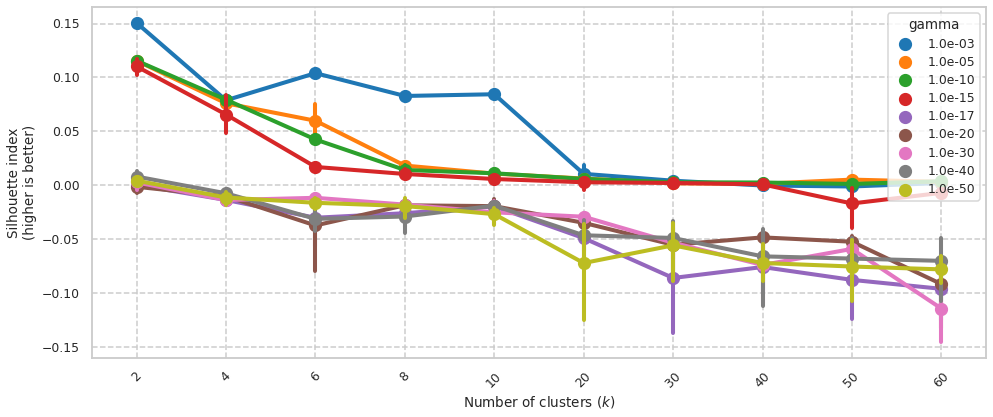

In [49]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="gamma")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

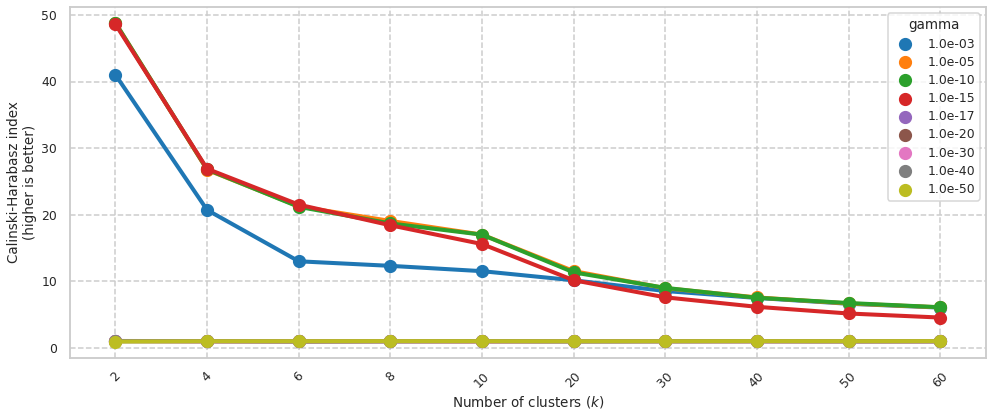

In [50]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="gamma")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

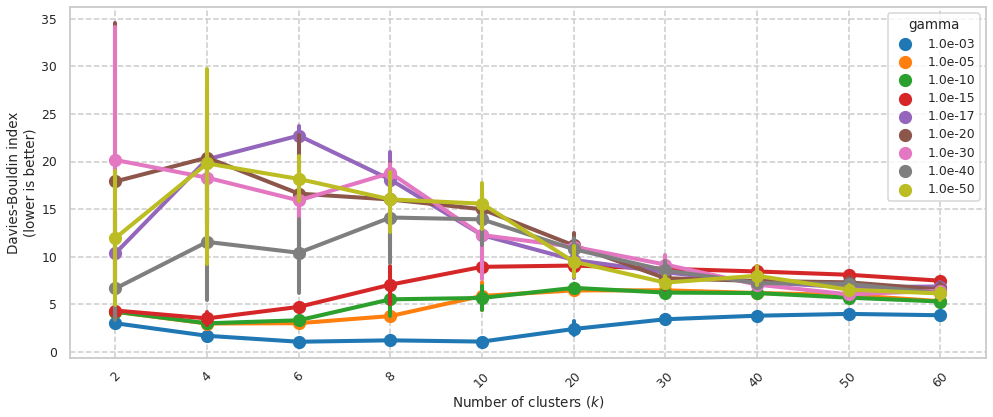

In [51]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="gamma")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [52]:
parts = ensemble.groupby(["gamma", "n_clusters"]).apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [53]:
parts.shape

(90,)

In [54]:
parts.head()

gamma    n_clusters
1.0e-03  2             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         4             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         6             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         8             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         10            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [55]:
parts.iloc[0].shape

(5, 3752)

In [56]:
assert np.all(
    [
        parts.loc[k].shape == (int(CLUSTERING_OPTIONS["N_REPS_PER_K"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [57]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [58]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="n_clusters"
)

In [59]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

1.0e-03  2     1.000000
1.0e-05  2     1.000000
1.0e-03  6     1.000000
         8     1.000000
         10    1.000000
1.0e-10  4     1.000000
         2     1.000000
1.0e-05  4     0.995818
1.0e-10  6     0.986798
1.0e-03  4     0.986266
1.0e-05  8     0.966363
1.0e-15  2     0.906711
1.0e-05  6     0.787118
1.0e-15  6     0.744010
         4     0.695673
Name: n_clusters, dtype: float64

In [60]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)
parts_ari_df.index.rename(["gamma", "n_clusters"], inplace=True)

In [61]:
parts_ari_df.shape

(90, 10)

In [62]:
_n_total_parts = int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"]
)  # * len(CLUSTERING_OPTIONS["GAMMAS"]))

assert int(_n_total_parts * (_n_total_parts - 1) / 2) == parts_ari_df.shape[1]

In [63]:
parts_ari_df.head()

0         1         2         3    4    5    6  \
gamma   n_clusters                                                          
1.0e-03 2           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        4           0.965666  0.965666  0.965666  0.965666  1.0  1.0  1.0   
        6           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        8           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        10          1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   

                      7    8    9  
gamma   n_clusters                 
1.0e-03 2           1.0  1.0  1.0  
        4           1.0  1.0  1.0  
        6           1.0  1.0  1.0  
        8           1.0  1.0  1.0  
        10          1.0  1.0  1.0

## Stability plot

In [64]:
parts_ari_df_plot = (
    parts_ari_df.stack().reset_index().rename(columns={"level_2": "idx", 0: "ari"})
)

In [65]:
parts_ari_df_plot.dtypes

gamma          object
n_clusters      int64
idx             int64
ari           float64
dtype: object

In [66]:
parts_ari_df_plot.head()

,gamma,n_clusters,idx,ari
0,1.0e-03,2,0,1.0
1,1.0e-03,2,1,1.0
2,1.0e-03,2,2,1.0
3,1.0e-03,2,3,1.0
4,1.0e-03,2,4,1.0


In [67]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = parts_ari_df_plot.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

idx       ari
n_clusters gamma                 
2          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.906711
           1.0e-17  4.5  0.004001
           1.0e-20  4.5 -0.001677
           1.0e-30  4.5  0.001834
           1.0e-40  4.5  0.013618
           1.0e-50  4.5 -0.000584
4          1.0e-03  4.5  0.986266
           1.0e-05  4.5  0.995818
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.695673
           1.0e-17  4.5 -0.003829
           1.0e-20  4.5  0.000769
           1.0e-30  4.5 -0.003668
           1.0e-40  4.5 -0.003335
           1.0e-50  4.5 -0.001469
6          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.787118
           1.0e-10  4.5  0.986798
           1.0e-15  4.5  0.744010
           1.0e-17  4.5  0.000145
           1.0e-20  4.5  0.000834
           1.0e-30  4.5 -0.002870
           1.0e-40  4.5 -0.002116
           1.0e-50  4.5  0.001750
8          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.966363
           1.0e-10  4.5  0.580678
           1.0e-15  4.5  0.285271
           1.0e-17  4.5  0.004148
           1.0e-20  4.5 -0.002328
           1.0e-30  4.5 -0.001816
           1.0e-40  4.5 -0.002650
           1.0e-50  4.5 -0.000171
10         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.451481
           1.0e-10  4.5  0.465165
           1.0e-15  4.5  0.099150
           1.0e-17  4.5  0.003599
           1.0e-20  4.5  0.006737
           1.0e-30  4.5  0.001878
           1.0e-40  4.5  0.004808
           1.0e-50  4.5  0.004643
20         1.0e-03  4.5  0.506257
           1.0e-05  4.5  0.341157
           1.0e-10  4.5  0.291858
           1.0e-15  4.5  0.045794
           1.0e-17  4.5  0.005386
           1.0e-20  4.5 -0.001409
           1.0e-30  4.5 -0.000160
           1.0e-40  4.5 -0.002656
           1.0e-50  4.5  0.003205
30         1.0e-03  4.5  0.277301
           1.0e-05  4.5  0.174251
           1.0e-10  4.5  0.179157
           1.0e-15  4.5  0.036122
           1.0e-17  4.5 -0.000306
           1.0e-20  4.5 -0.005058
           1.0e-30  4.5  0.002375
           1.0e-40  4.5 -0.003397
           1.0e-50  4.5  0.003594
40         1.0e-03  4.5  0.248605
           1.0e-05  4.5  0.097989
           1.0e-10  4.5  0.104159
           1.0e-15  4.5  0.028347
           1.0e-17  4.5 -0.001616
           1.0e-20  4.5  0.001702
           1.0e-30  4.5  0.003421
           1.0e-40  4.5  0.002916
           1.0e-50  4.5  0.002522
50         1.0e-03  4.5  0.137831
           1.0e-05  4.5  0.085840
           1.0e-10  4.5  0.081443
           1.0e-15  4.5  0.024901
           1.0e-17  4.5  0.003959
           1.0e-20  4.5  0.001257
           1.0e-30  4.5  0.010061
           1.0e-40  4.5  0.001118
           1.0e-50  4.5  0.001435
60         1.0e-03  4.5  0.107163
           1.0e-05  4.5  0.063997
           1.0e-10  4.5  0.065680
           1.0e-15  4.5  0.019289
           1.0e-17  4.5  0.004780
           1.0e-20  4.5  0.006185
           1.0e-30  4.5  0.006208
           1.0e-40  4.5  0.006095
           1.0e-50  4.5  0.005996

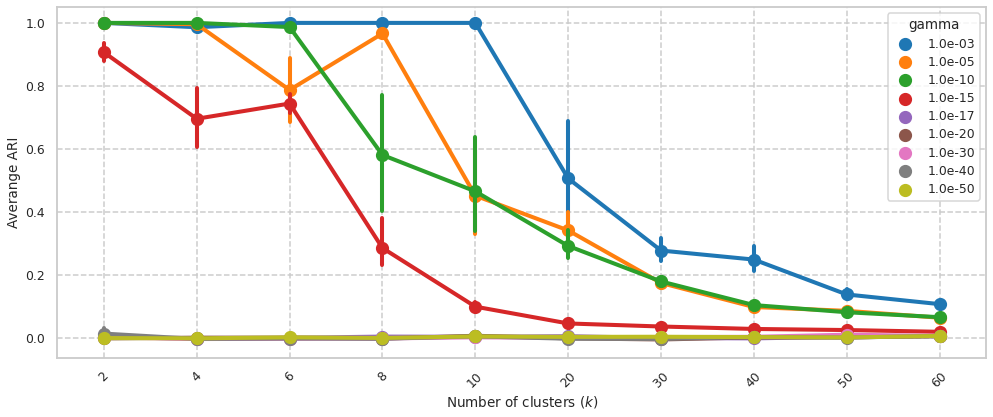

In [68]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="n_clusters", y="ari", hue="gamma")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Conclusions

**UPDATE** We choose `1e-10` as the `gamma` parameter for this data version.